In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [10]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
verification_model_folder = '/content/drive/My Drive/processed_images/verification_model'
images_folder = os.path.join(verification_model_folder, 'images')
annotations_folder = os.path.join(verification_model_folder, 'annotations')

# Define directories for training and validation datasets
train_images_folder = os.path.join(verification_model_folder, 'train/images')
train_labels_folder = os.path.join(verification_model_folder, 'train/labels')
val_images_folder = os.path.join(verification_model_folder, 'val/images')
val_labels_folder = os.path.join(verification_model_folder, 'val/labels')

os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(train_labels_folder, exist_ok=True)
os.makedirs(val_images_folder, exist_ok=True)
os.makedirs(val_labels_folder, exist_ok=True)

# Get list of images and corresponding annotations
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
annotation_files = [f.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt') for f in image_files]

# Print the number of input images
print(f"Total input images: {len(image_files)}")

# Split the dataset into training and validation sets
train_images, val_images, train_annotations, val_annotations = train_test_split(
    image_files, annotation_files, test_size=0.2, random_state=42)

# Copy the files to the respective directories
for img, ann in zip(train_images, train_annotations):
    shutil.copy(os.path.join(images_folder, img), os.path.join(train_images_folder, img))
    annotation_path = os.path.join(annotations_folder, ann)
    if os.path.exists(annotation_path):
        shutil.copy(annotation_path, os.path.join(train_labels_folder, ann))
    else:
        print(f"Warning: Annotation file not found for {img}")

for img, ann in zip(val_images, val_annotations):
    shutil.copy(os.path.join(images_folder, img), os.path.join(val_images_folder, img))
    annotation_path = os.path.join(annotations_folder, ann)
    if os.path.exists(annotation_path):
        shutil.copy(annotation_path, os.path.join(val_labels_folder, ann))
    else:
        print(f"Warning: Annotation file not found for {img}")

# Print the number of images in training and validation sets
print(f"Total training images: {len(train_images)}")
print(f"Total validation images: {len(val_images)}")


Total input images: 165
Total training images: 132
Total validation images: 33


In [4]:
yaml_content = """
train: /content/drive/My Drive/processed_images/verification_model/train/images
val: /content/drive/My Drive/processed_images/verification_model/val/images

nc: 1  # Number of classes
names: ['human_on_chair']  # Class name
"""

yaml_path = '/content/drive/My Drive/processed_images/verification_model/custom_data.yaml'
with open(yaml_path, 'w') as yaml_file:
    yaml_file.write(yaml_content)

print("YAML configuration file created successfully.")


YAML configuration file created successfully.


In [2]:
# Clone YOLOv5 repository and navigate to its directory
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install required dependencies
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [7]:


# Plot training results
from utils.plots import plot_results

!python train.py --img 640 --batch 16 --epochs 50 --data '/content/drive/My Drive/processed_images/verification_model/custom_data.yaml' --weights yolov5s.pt --project '/content/drive/My Drive/fine_tuning_yolo/results' --name finetune_yolo

#plot_results(save_dir='/content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo')  # plot training results


2024-05-26 19:51:05.199915: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 19:51:05.200020: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 19:51:05.203085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/My Drive/processed_images/verification_model/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image

TypeError: plot_results() got an unexpected keyword argument 'save_dir'

In [9]:

# Evaluate the model on the validation set
!python val.py --data '/content/drive/My Drive/processed_images/verification_model/custom_data.yaml' --weights '/content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo2/weights/best.pt' --img 640 --task val

val: data=/content/drive/My Drive/processed_images/verification_model/custom_data.yaml, weights=['/content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
100% 755k/755k [00:00<00:00, 24.2MB/s]
val: Scanning /content/drive/My Drive/processed_images/verification_model/val/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:30<00:00, 15.26s/it]
                   all         3

In [13]:
# Define the path to the most recent results directory
results_dir = '/content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo2'
results_file = os.path.join(results_dir, 'results.csv')

In [23]:
import pandas as pd
# Load the results.csv file
results_file = os.path.join(results_dir, 'results.csv')
results_df = pd.read_csv(results_file)
results_df.head(2)

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.101480,0.032533,0,0.047691,...,0.020652,0,0.092800,0.000800,0.000800
1,1,0.070297,0.030472,0,0.045038,...,0.015776,0,0.084666,0.001666,0.001666


In [32]:

%matplotlib inline


import utils
# Import the plot_results function from utils.plots
from utils.plots import plot_results


# Ensure the correct path is passed to plot_results
os.chdir(results_dir)
plot_results('.')  # Use '.' to specify the current directory where results.csv is located


# test on an image

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


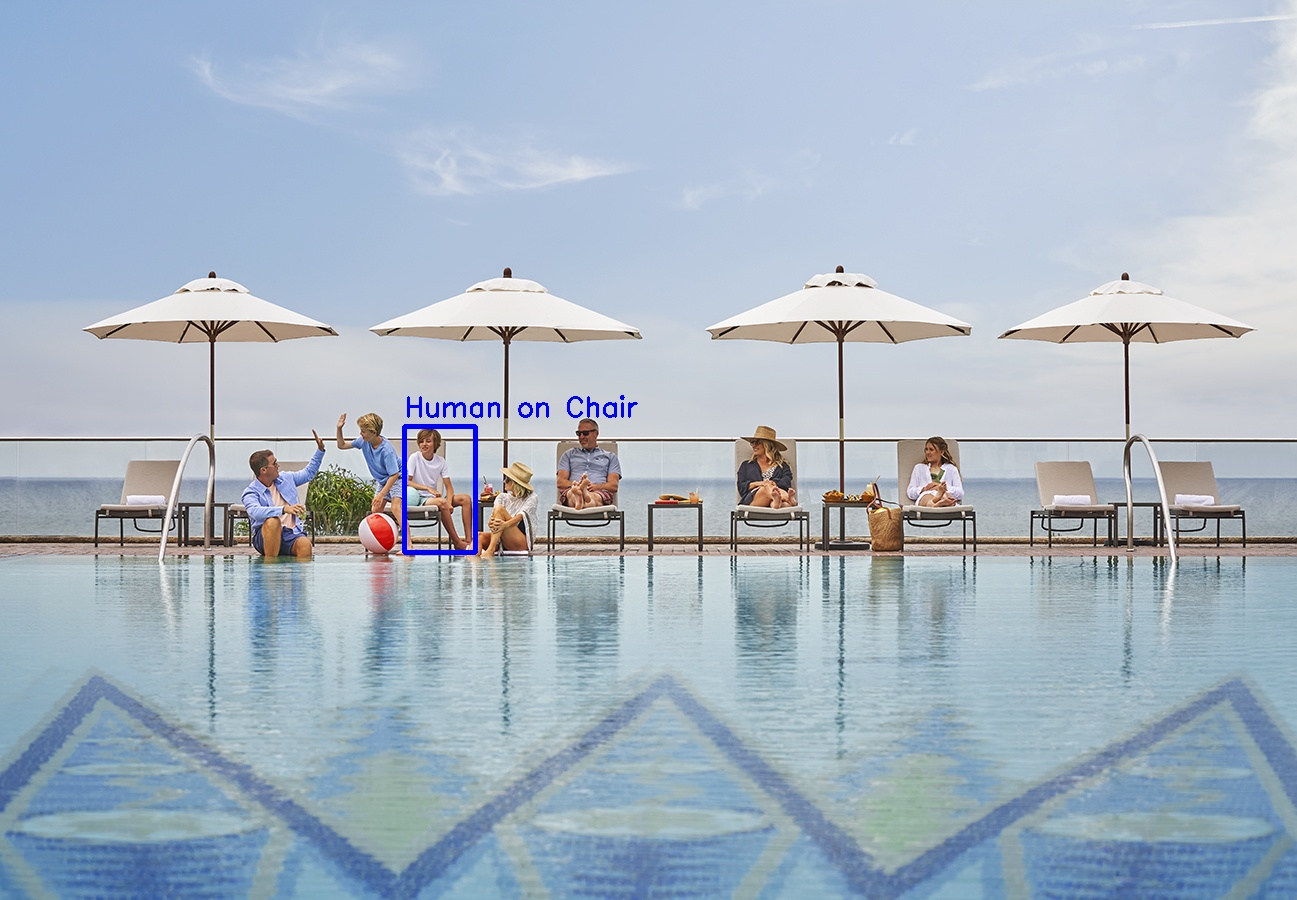

In [24]:

import torch

# Path to the saved weights
weights_path = '/content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo2/weights/best.pt'

# Load the YOLOv5 model with the fine-tuned weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)

# Perform inference
# Load an example image
img = '/content/drive/My Drive/processed_images/verification_model/images/MLB-1-LS-POOL-01-MOSAIC-0158-B.jpg'

# Inference
results = model(img)

# Display results
results.show()


In [34]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Clone YOLOv5 Repository and Install Dependencies
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# Step 3: Verify Directory and File Path
import os

# Define the path to the results directory
results_dir = '/content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo2'
results_file = os.path.join(results_dir, 'results.csv')

# Check if the directory and file exist
if not os.path.exists(results_file):
    print(f"No results.csv file found at {results_file}. Please check the path.")
else:
    print(f"Found results.csv at {results_file}.")

    # Step 4: Ensure plots are displayed in Jupyter notebooks
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline

    # Import the plot_results function from utils.plots
    from utils.plots import plot_results

    # Call the plot_results function with the correct path
    # Ensure the correct path is passed to plot_results
    os.chdir(results_dir)
    plot_results('.')  # Use '.' to specify the current directory where results.csv is located



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'yolov5'...
remote: Enumerating objects: 16625, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 16625 (delta 58), reused 65 (delta 30), pack-reused 16522
Receiving objects: 100% (16625/16625), 15.10 MiB | 12.83 MiB/s, done.
Resolving deltas: 100% (11417/11417), done.
/content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo2/yolov5/yolov5
Found results.csv at /content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo2/results.csv.


Found results.csv at /content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo2/results.csv.
Cleaned column names in the results.csv file:
Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')


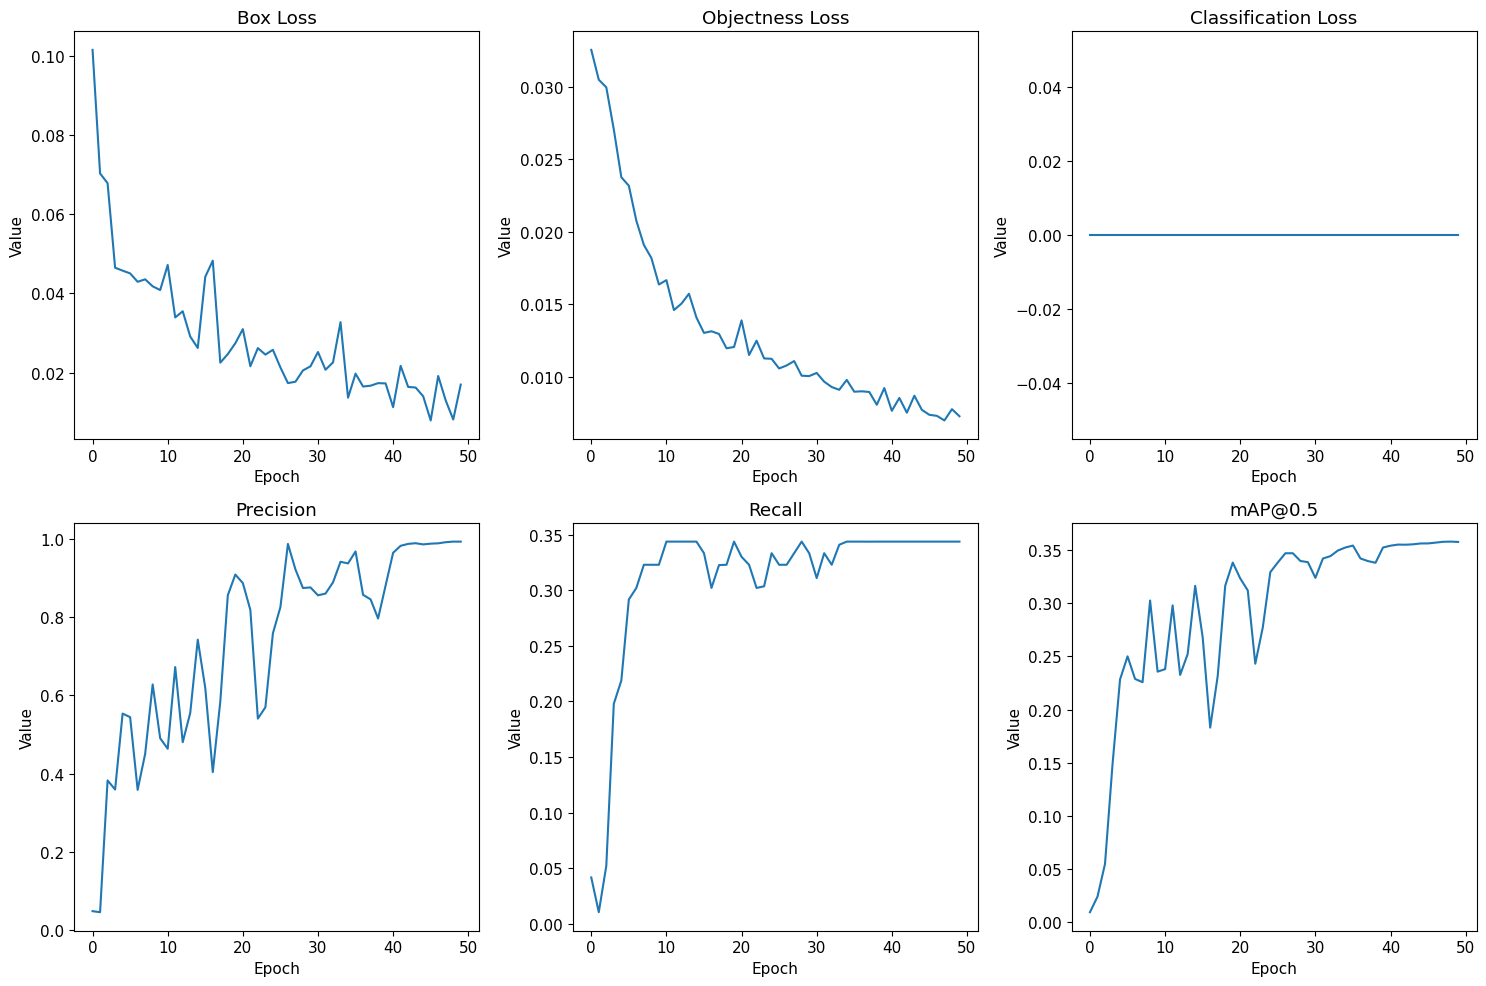

In [35]:
# Define the path to the results directory
results_dir = '/content/drive/My Drive/fine_tuning_yolo/results/finetune_yolo2'
results_file = os.path.join(results_dir, 'results.csv')

# Check if the directory and file exist
if not os.path.exists(results_file):
    print(f"No results.csv file found at {results_file}. Please check the path.")
else:
    print(f"Found results.csv at {results_file}.")

    # Step 3: Load and manually plot results
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline

    # Load the results.csv file
    results_df = pd.read_csv(results_file)

    # Strip whitespace from column names
    results_df.columns = results_df.columns.str.strip()

    # Print the cleaned column names to confirm
    print("Cleaned column names in the results.csv file:")
    print(results_df.columns)

    # Manually plot the results with the correct column names
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
    metrics = ['train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5']
    titles = ['Box Loss', 'Objectness Loss', 'Classification Loss', 'Precision', 'Recall', 'mAP@0.5']

    for i, metric in enumerate(metrics):
        row = i // 3
        col = i % 3
        if metric in results_df.columns:
            ax[row, col].plot(results_df[metric])
            ax[row, col].set_title(titles[i])
            ax[row, col].set_xlabel('Epoch')
            ax[row, col].set_ylabel('Value')
        else:
            print(f"Column '{metric}' not found in results.csv.")

    plt.tight_layout()
    plt.show()